In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/CV

Mounted at /content/drive
/content/drive/MyDrive/CV


# Detectron2 Beginner's Tutorial -- AMMI CV Week 2 Lab 1

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [2]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 276kB 6.3MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=471cdd83e0a4544dee3dcee931a6cd9d8165d16292e9ac9fe0ab575ada082308
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.8.1+cu101 False
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.2MB 846kB/s 
     |████████████████████████████████| 51kB 2.4MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=5a467571ce1cfc19fa63243569058090271d7fb3fb61200a7c1eb6e6bdf19283
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
Successfully built fvcore


In [4]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

In [5]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
# im = cv2.imread("./input.jpg")
catsd_dogs = cv2.imread("./cats_dogs.jpeg")
# ammi = cv2.imread("./Group.jpg")
# slam_dunk = cv2.imread("./SlamDunk.jpg")
# AVATAR = cv2.imread("./AVATAR.jpeg")
# ErenVSRiener = cv2.imread("./ErenVSRiener.jpeg")
# objects = cv2.imread("./objects3.jpeg")
# small_kitchen = cv2.imread("./small_kitchen.png")

In [19]:
# cv2_imshow(living_room)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [28]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
# print(outputs["instances"].pred_classes)
# print(outputs["instances"].pred_boxes)

In [6]:
Config_File = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file(Config_File))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(Config_File)
is_predictor = DefaultPredictor(cfg)
def Instance_Segmentation(image):
  outputs = is_predictor(image)
  v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

RuntimeError: ignored

In [53]:
# Config_File = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"
# cfg = get_cfg()
# # add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
# cfg.merge_from_file(model_zoo.get_config_file(Config_File))
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# # Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(Config_File)
# is2_predictor = DefaultPredictor(cfg)
# def Instance_SegmentationII(image):
#   outputs = is2_predictor(image)
#   v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
#   out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#   cv2_imshow(out.get_image()[:, :, ::-1])

In [64]:
Instance_Segmentation(ammi)

Output hidden; open in https://colab.research.google.com to view.

Correct Instance Segmentation.
The predictions are detailed and perfect.



In [12]:
Instance_Segmentation(slam_dunk)

Output hidden; open in https://colab.research.google.com to view.

Correct Instance Segmentation. The predictions are almost perfect, despite that it's not a realistic picture [Slam Dunk Manga].

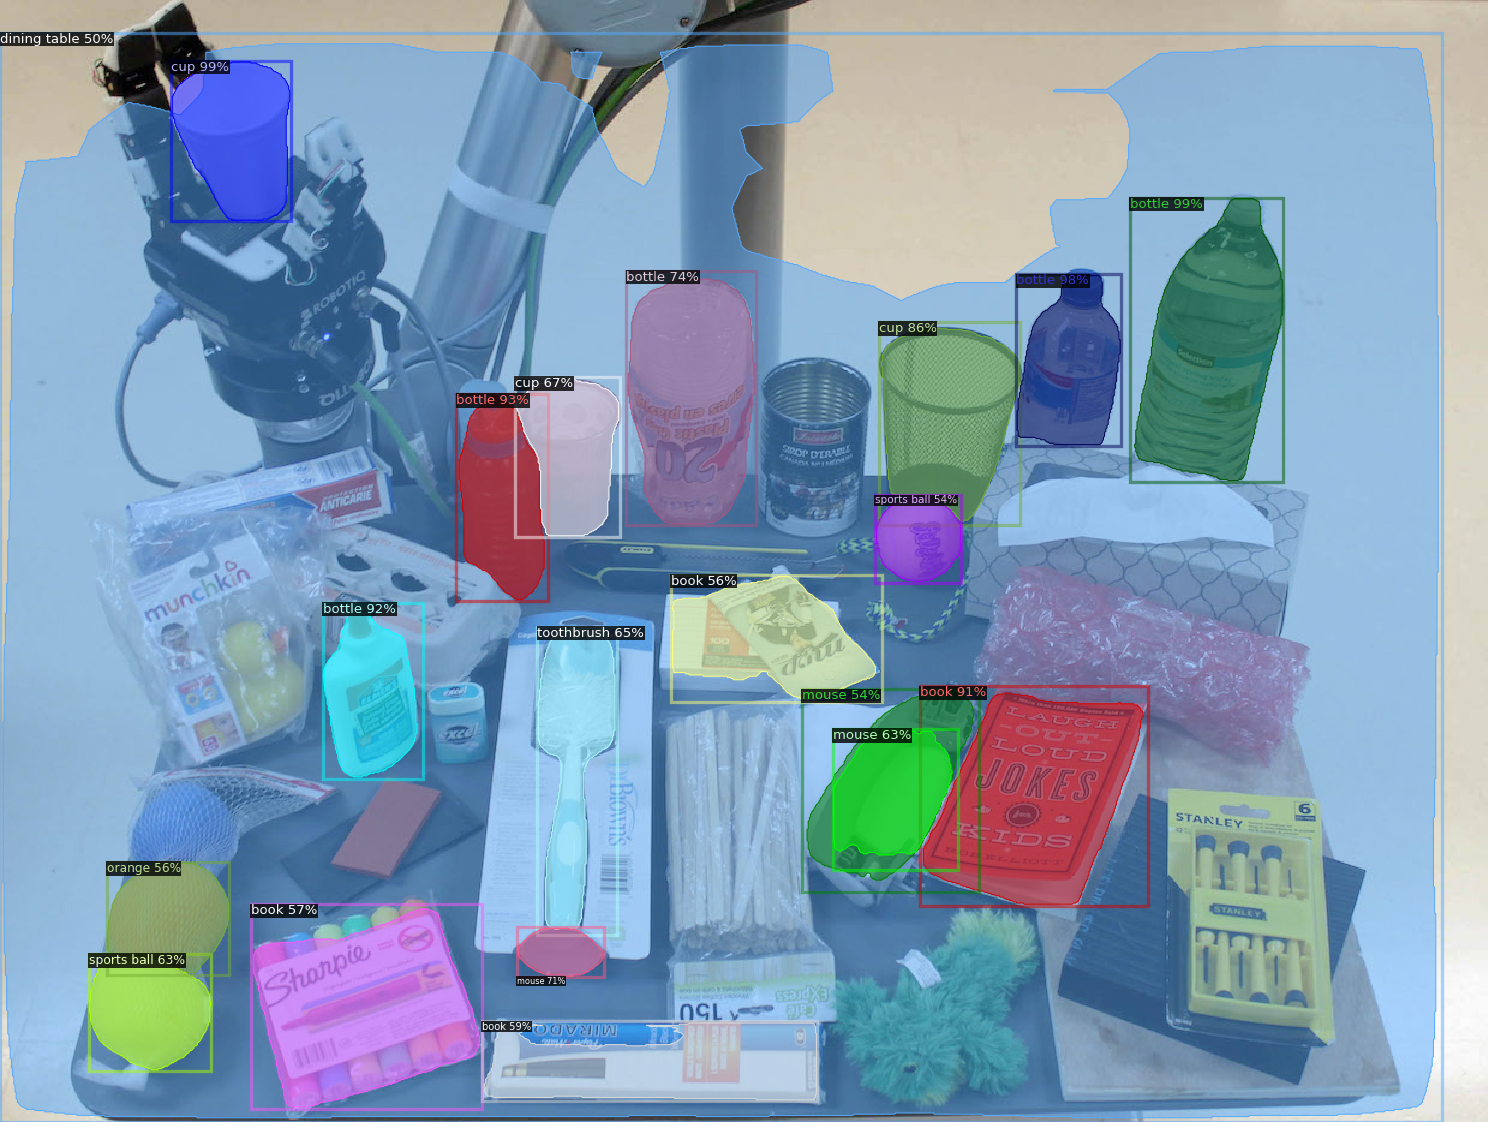

In [44]:
Instance_Segmentation(objects)

Incorrect Instance Segmentation. Some of the predictions are incorrect. The model predicts an empty space with [mouse 63%], highlighters with [book 57%], and a bottle brush with [toothbrush 65% and mouse 71%].

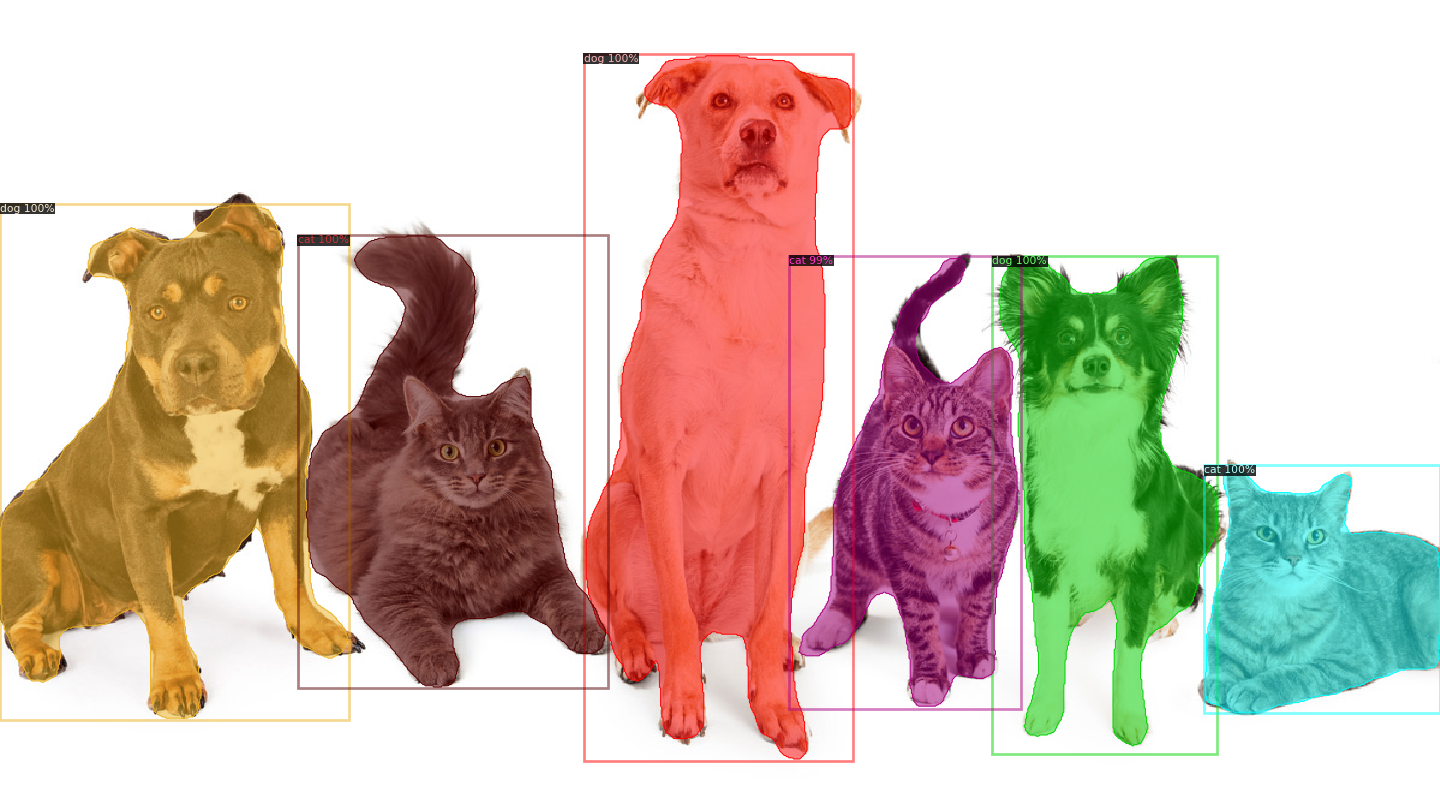

In [46]:
Instance_Segmentation(cats_and_dogs)

Incorrect Instance Segmentation.

# Human pose estimation

In [55]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config

# Navigate to the Detectron2 Model Zoo and figure out a suitable model yaml configuration
# file to use. Follow the example above as a template.
# Model Zoo: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md

CONFIG_FILE = "COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(CONFIG_FILE)
kp_predictor = DefaultPredictor(cfg)
def KP_Estimator(image):
  outputs = kp_predictor(image)
  v = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

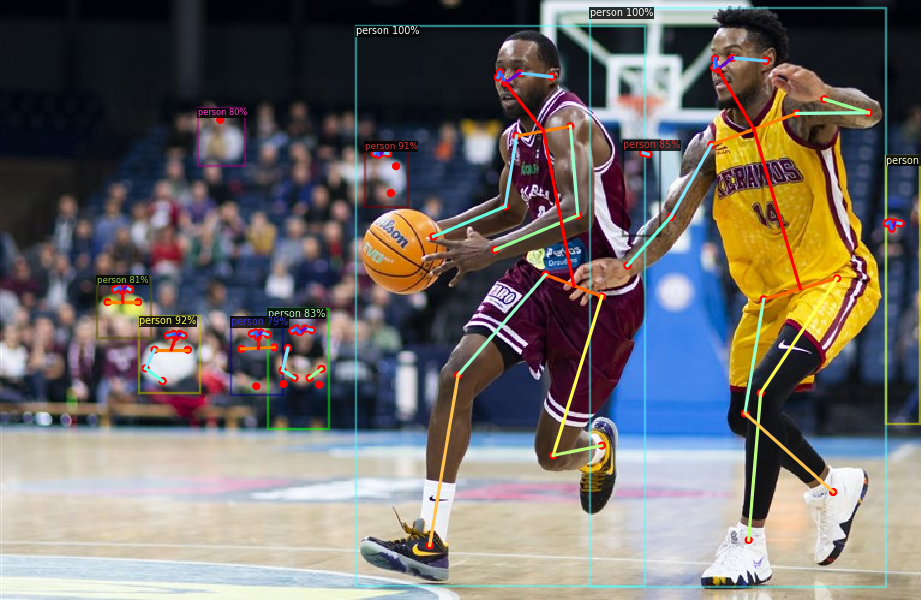

In [65]:
KP_Estimator(cv2.imread("./BB.jpeg"))

Correct Pose Estimation.
The predictions follow the two players perfectly. Some of the people in the background do have partial predictions; because they're blurry.

In [69]:
KP_Estimator(cv2.imread("./Avatar.jpeg"))

Output hidden; open in https://colab.research.google.com to view.

Correct Pose Estimation.
The predictions follow the character almost perfectly. However, some part are missing; because some are occluded, and probably because they're animated characters.

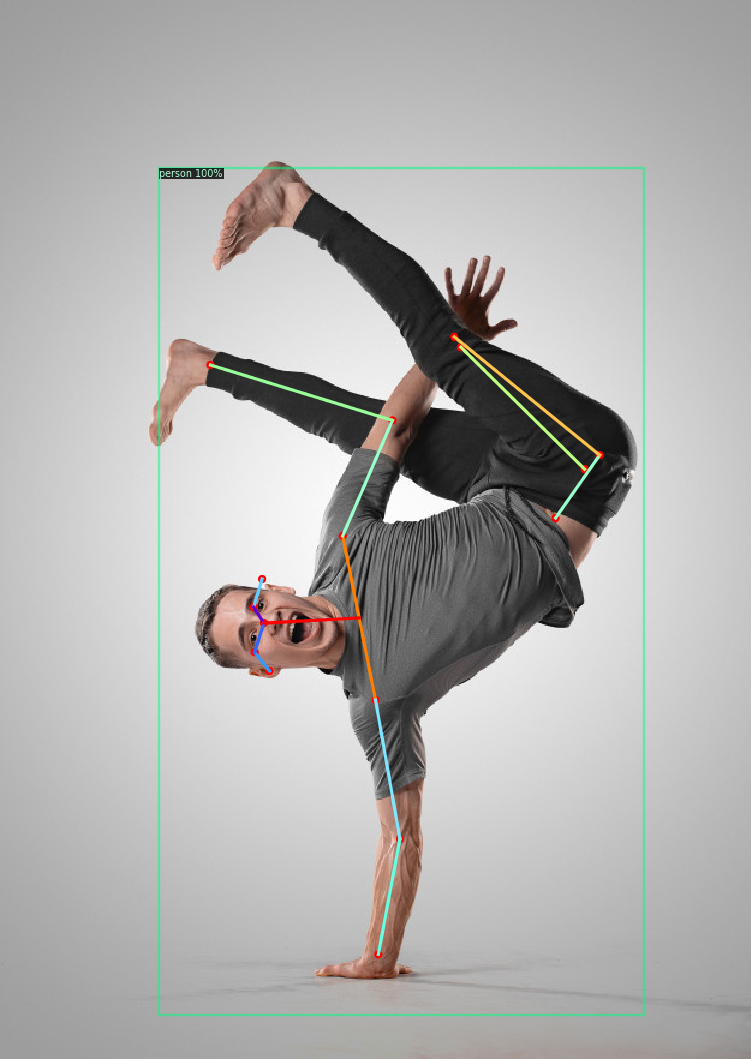

In [67]:
KP_Estimator(cv2.imread("./break_dance.jpeg"))

Incorrect Pose Estimation.
The shape of the prediction doesn't follow the body of the man, because of the strange posture.

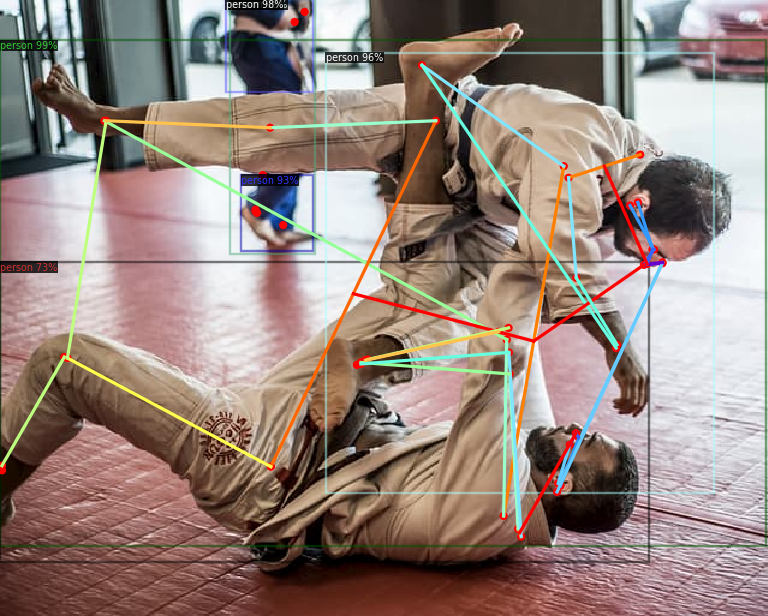

In [62]:
KP_Estimator(cv2.imread("./BJJ.jpeg"))

Incorrect Pose Estimation.
The shape of the predictions don't follow the two bodies; because of the complex interaction.